# SENSITIVITY ANALYSIS
The preliminary results in our IMAGEN paper advocates for a more in-depth understanding of what contributes to the significant performance of the ML models for the three time-points. Here we will throw several _what-if_ and _why_ questions at the results to help us understand better how the ML models worked.

1. Why does the ML model perform well at predicting (AAM vs controls) with some AAM labels (ex: Binge, binge-growth) but not others (Onset, Frequency)? 
2. How consistent are all 4 ML model predictions with one another?
3. Are the same subjects mispredicted at all 3 timepoints?
4. Where the results specifically good for some sites and bad for some others? Across the 4 models? does the finding generalize to holdout?

In [1]:
%load_ext autoreload
%autoreload 2

from imagen_post_hoc_helper import *

Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.


In [2]:
sys.path.insert(1, '../MLpipelines/')
from plotResults import *

In [3]:
LABEL = 'Binge'
MODELS=["SVM-rbf","GB","SVM-lin","LR"]

## Compare the 10 AAM phenotypes

**Main insights from below analysis**
<div class="alert alert-block alert-success">
 <br>
    1. Binge correlates strongly with all labels except Onset ($r^2 \ge 0.65$). <br>
    2. As expected, `AUDIT` `AUDIT-C` and  `AUDIT-growth` are highly correlated ($r^2 \ge 0.95$). <br>
    3. Our compound label `Combined_ours` is correlated strongly with Binge, AUDIT and Amount ($r^2 = 0.67-0.92$) but not with Frequency. <br>
    4. `Onset` correlates least ($r^2 \le 0.16$) . <br>
    5. `Frequency` correlates second least. <br>
</div>

#### How similar are the 10 AAM labels?

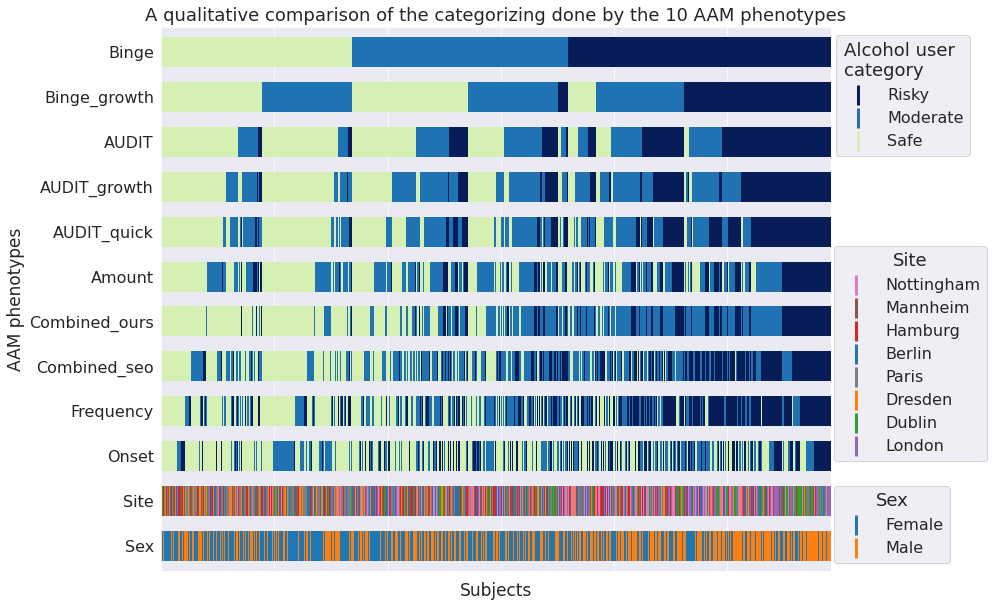

In [4]:
df_all_labels = load_all_labels('FU3', 'categorize', exclude_holdout=False).dropna()

confs=['Sex', 'Site']
    
sort_order =  [n for n in sorted(df_all_labels.columns) if "binge" in n.lower()] + \
[n for n in sorted(df_all_labels.columns) if ("binge" not in n.lower()) and (n not in confs)] 
# sort_order = list(reversed(sort_order))
# print(sort_order)
fig, ax = plt.subplots(figsize=(12,len(sort_order)))

plot_subject_classes(df_all_labels, ax, confs=confs,
                     sort_order=sort_order, 
                     title="A qualitative comparison of the categorizing done by the 10 AAM phenotypes",
                     lw=30, cmap=plt.cm.YlGnBu)
plt.show()

#### How correlated are the 10 labels?

In [3]:
for tp in ["FU3", "FU2", "BL"]:
    print(f"================================================================\n{tp}:")
    for title, val_type, exclude_holdout, corr in [
        ["Correlation between raw values of the 10 AAM phenotype", 'raw', False, 'r-squared'], 
        ["Correlation after categorizing them into 3 severity levels", 'categorize', False, 'r-squared'], 
        ["Agreement after binarizing them into AAM vs controls (excluding holdout)", 'binarize', True, 'r-squared']
        ]:

        print(f"----------------------------------------------------------------\n{title}:")

        df_all_labels = load_all_labels(tp, val_type=val_type, exclude_holdout=exclude_holdout)
        display(get_corr(df_all_labels, corr, mask_diag_repeatitions=True)[0])


FU3:
----------------------------------------------------------------
Correlation between raw values of the 10 AAM phenotype:


,Binge,Sex,Site,Binge_growth,Combined_seo,Combined_ours,AUDIT,AUDIT_quick,AUDIT_growth,Onset,Frequency,Amount
Binge,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
Sex,4.0%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
Site,0.4%,0.0%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
Binge_growth,50.4%,3.4%,0.1%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
Combined_seo,38.9%,5.2%,0.3%,45.7%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
Combined_ours,46.9%,4.3%,0.4%,39.7%,27.5%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
AUDIT,32.2%,4.1%,0.0%,30.1%,25.0%,40.2%,nan%,nan%,nan%,nan%,nan%,nan%
AUDIT_quick,38.4%,5.6%,0.2%,35.1%,31.1%,54.0%,71.2%,nan%,nan%,nan%,nan%,nan%
AUDIT_growth,28.3%,2.8%,0.2%,27.2%,33.2%,24.3%,45.4%,36.0%,nan%,nan%,nan%,nan%
Onset,23.8%,0.3%,0.1%,11.8%,15.2%,10.2%,10.0%,8.5%,21.8%,nan%,nan%,nan%


----------------------------------------------------------------
Correlation after categorizing them into 3 severity levels:


,Binge,Sex,Site,Binge_growth,Combined_seo,Combined_ours,AUDIT,AUDIT_quick,AUDIT_growth,Onset,Frequency,Amount
Binge,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
Sex,5.4%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
Site,0.2%,0.0%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
Binge_growth,30.0%,2.4%,0.0%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
Combined_seo,33.8%,4.7%,0.2%,25.4%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
Combined_ours,45.7%,4.2%,0.4%,26.7%,22.7%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
AUDIT,37.7%,3.7%,0.1%,23.6%,27.2%,44.7%,nan%,nan%,nan%,nan%,nan%,nan%
AUDIT_quick,34.7%,4.4%,0.1%,23.6%,26.2%,47.7%,65.6%,nan%,nan%,nan%,nan%,nan%
AUDIT_growth,37.7%,4.1%,0.0%,19.5%,32.1%,38.6%,69.2%,57.7%,nan%,nan%,nan%,nan%
Onset,8.6%,0.0%,0.0%,6.0%,5.2%,5.3%,3.4%,3.8%,2.0%,nan%,nan%,nan%


----------------------------------------------------------------
Agreement after binarizing them into AAM vs controls (excluding holdout):
[WARN]Binge vs Binge_growth: Only 421 out of 2168 subjects used due to NaN values (81% dropped)
[WARN]Binge vs Combined_seo: Only 461 out of 2168 subjects used due to NaN values (79% dropped)
[WARN]Binge vs Combined_ours: Only 447 out of 2168 subjects used due to NaN values (79% dropped)
[WARN]Binge vs AUDIT: Only 542 out of 2168 subjects used due to NaN values (75% dropped)
[WARN]Binge vs AUDIT_quick: Only 491 out of 2168 subjects used due to NaN values (77% dropped)
[WARN]Binge vs AUDIT_growth: Only 462 out of 2168 subjects used due to NaN values (79% dropped)
[WARN]Binge vs Onset: Only 490 out of 2168 subjects used due to NaN values (77% dropped)
[WARN]Binge vs Amount: Only 453 out of 2168 subjects used due to NaN values (79% dropped)
[WARN]Binge_growth vs Binge: Only 421 out of 2168 subjects used due to NaN values (81% dropped)
[WARN]Binge_growt

,Binge,Sex,Site,Binge_growth,Combined_seo,Combined_ours,AUDIT,AUDIT_quick,AUDIT_growth,Onset,Frequency,Amount
Binge,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
Sex,8.6%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
Site,0.1%,0.0%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
Binge_growth,65.7%,5.5%,0.0%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
Combined_seo,67.8%,8.4%,0.7%,68.9%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
Combined_ours,80.2%,5.6%,0.2%,67.9%,45.2%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
AUDIT,65.7%,5.6%,0.3%,53.4%,53.3%,84.6%,nan%,nan%,nan%,nan%,nan%,nan%
AUDIT_quick,65.2%,7.2%,0.4%,58.9%,53.2%,91.4%,96.5%,nan%,nan%,nan%,nan%,nan%
AUDIT_growth,71.8%,7.7%,0.1%,54.3%,67.5%,82.5%,97.9%,93.4%,nan%,nan%,nan%,nan%
Onset,18.3%,0.0%,0.0%,8.9%,12.5%,9.2%,6.6%,9.3%,4.9%,nan%,nan%,nan%


FU2:
----------------------------------------------------------------
Correlation between raw values of the 10 AAM phenotype:


,Binge,Sex,Site,Binge_growth,Combined_seo,Combined_ours,AUDIT,AUDIT_quick,AUDIT_growth,Onset,Frequency,Amount
Binge,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
Sex,4.0%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
Site,0.6%,0.0%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
Binge_growth,51.4%,2.5%,0.1%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
Combined_seo,38.3%,4.8%,0.5%,45.0%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
Combined_ours,47.8%,4.1%,0.3%,38.5%,26.3%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
AUDIT,32.3%,4.1%,0.0%,28.6%,24.6%,41.3%,nan%,nan%,nan%,nan%,nan%,nan%
AUDIT_quick,37.8%,5.7%,0.1%,33.1%,29.6%,54.3%,71.8%,nan%,nan%,nan%,nan%,nan%
AUDIT_growth,29.5%,1.6%,0.3%,29.1%,33.7%,24.7%,46.9%,36.9%,nan%,nan%,nan%,nan%
Onset,24.1%,0.3%,0.1%,12.4%,14.8%,10.5%,9.7%,8.5%,22.0%,nan%,nan%,nan%


----------------------------------------------------------------
Correlation after categorizing them into 3 severity levels:


,Binge,Sex,Site,Binge_growth,Combined_seo,Combined_ours,AUDIT,AUDIT_quick,AUDIT_growth,Onset,Frequency,Amount
Binge,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
Sex,3.9%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
Site,0.2%,0.0%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
Binge_growth,26.4%,1.7%,0.0%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
Combined_seo,28.5%,4.6%,0.5%,25.0%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
Combined_ours,45.3%,3.6%,0.3%,22.8%,19.9%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
AUDIT,38.2%,2.9%,0.1%,19.0%,22.7%,44.0%,nan%,nan%,nan%,nan%,nan%,nan%
AUDIT_quick,33.7%,3.8%,0.1%,18.7%,21.2%,46.9%,65.1%,nan%,nan%,nan%,nan%,nan%
AUDIT_growth,30.6%,3.9%,0.1%,16.4%,35.2%,32.0%,58.8%,48.1%,nan%,nan%,nan%,nan%
Onset,6.9%,0.0%,0.0%,5.6%,4.4%,5.7%,3.1%,3.7%,1.4%,nan%,nan%,nan%


----------------------------------------------------------------
Agreement after binarizing them into AAM vs controls (excluding holdout):
[WARN]Binge vs Binge_growth: Only 415 out of 2168 subjects used due to NaN values (81% dropped)
[WARN]Binge vs Combined_seo: Only 482 out of 2168 subjects used due to NaN values (78% dropped)
[WARN]Binge vs Combined_ours: Only 443 out of 2168 subjects used due to NaN values (80% dropped)
[WARN]Binge vs AUDIT: Only 532 out of 2168 subjects used due to NaN values (75% dropped)
[WARN]Binge vs AUDIT_quick: Only 481 out of 2168 subjects used due to NaN values (78% dropped)
[WARN]Binge vs AUDIT_growth: Only 458 out of 2168 subjects used due to NaN values (79% dropped)
[WARN]Binge vs Onset: Only 474 out of 2168 subjects used due to NaN values (78% dropped)
[WARN]Binge vs Frequency: Only 541 out of 2168 subjects used due to NaN values (75% dropped)
[WARN]Binge vs Amount: Only 441 out of 2168 subjects used due to NaN values (80% dropped)
[WARN]Binge_growth v

,Binge,Sex,Site,Binge_growth,Combined_seo,Combined_ours,AUDIT,AUDIT_quick,AUDIT_growth,Onset,Frequency,Amount
Binge,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
Sex,8.1%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
Site,0.1%,0.0%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
Binge_growth,68.1%,3.7%,0.0%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
Combined_seo,67.7%,7.6%,0.9%,69.0%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
Combined_ours,82.1%,5.1%,0.2%,65.9%,44.6%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
AUDIT,68.4%,5.1%,0.3%,50.4%,51.0%,85.9%,nan%,nan%,nan%,nan%,nan%,nan%
AUDIT_quick,65.5%,7.4%,0.3%,53.8%,49.8%,91.2%,97.1%,nan%,nan%,nan%,nan%,nan%
AUDIT_growth,70.8%,6.9%,0.3%,49.8%,71.1%,80.8%,97.9%,92.5%,nan%,nan%,nan%,nan%
Onset,15.6%,0.0%,0.0%,9.0%,11.2%,8.8%,5.1%,8.3%,3.3%,nan%,nan%,nan%


BL:
----------------------------------------------------------------
Correlation between raw values of the 10 AAM phenotype:


,Binge,Sex,Site,Binge_growth,Combined_seo,Combined_ours,AUDIT,AUDIT_quick,AUDIT_growth,Onset,Frequency,Amount
Binge,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
Sex,3.6%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
Site,0.6%,0.0%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
Binge_growth,49.8%,2.6%,0.0%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
Combined_seo,38.3%,4.0%,0.6%,43.8%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
Combined_ours,46.7%,3.9%,0.2%,36.9%,25.8%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
AUDIT,31.4%,4.2%,0.0%,28.1%,24.8%,40.5%,nan%,nan%,nan%,nan%,nan%,nan%
AUDIT_quick,37.7%,5.7%,0.3%,32.8%,30.4%,54.3%,71.6%,nan%,nan%,nan%,nan%,nan%
AUDIT_growth,28.7%,1.1%,0.4%,26.9%,33.2%,20.7%,45.9%,36.1%,nan%,nan%,nan%,nan%
Onset,23.3%,0.2%,0.2%,11.4%,15.2%,9.9%,8.8%,7.9%,20.0%,nan%,nan%,nan%


----------------------------------------------------------------
Correlation after categorizing them into 3 severity levels:


,Binge,Sex,Site,Binge_growth,Combined_seo,Combined_ours,AUDIT,AUDIT_quick,AUDIT_growth,Onset,Frequency,Amount
Binge,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
Sex,2.8%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
Site,0.2%,0.0%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
Binge_growth,23.5%,1.4%,0.0%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
Combined_seo,25.4%,2.8%,0.4%,21.7%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
Combined_ours,41.7%,2.8%,0.3%,21.7%,17.4%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
AUDIT,35.0%,2.6%,0.1%,17.2%,20.9%,42.3%,nan%,nan%,nan%,nan%,nan%,nan%
AUDIT_quick,32.5%,3.2%,0.2%,17.6%,19.8%,46.3%,65.4%,nan%,nan%,nan%,nan%,nan%
AUDIT_growth,26.5%,2.6%,0.1%,15.4%,30.6%,28.5%,54.3%,44.6%,nan%,nan%,nan%,nan%
Onset,6.6%,0.0%,0.0%,4.7%,4.2%,6.1%,3.2%,3.7%,1.2%,nan%,nan%,nan%


----------------------------------------------------------------
Agreement after binarizing them into AAM vs controls (excluding holdout):
[WARN]Binge vs Binge_growth: Only 467 out of 2168 subjects used due to NaN values (78% dropped)
[WARN]Binge vs Combined_seo: Only 511 out of 2168 subjects used due to NaN values (76% dropped)
[WARN]Binge vs Combined_ours: Only 513 out of 2168 subjects used due to NaN values (76% dropped)
[WARN]Binge vs AUDIT_growth: Only 530 out of 2168 subjects used due to NaN values (76% dropped)
[WARN]Binge vs Amount: Only 519 out of 2168 subjects used due to NaN values (76% dropped)
[WARN]Binge_growth vs Binge: Only 467 out of 2168 subjects used due to NaN values (78% dropped)
[WARN]Binge_growth vs Combined_seo: Only 504 out of 2168 subjects used due to NaN values (77% dropped)
[WARN]Binge_growth vs Combined_ours: Only 458 out of 2168 subjects used due to NaN values (79% dropped)
[WARN]Binge_growth vs AUDIT: Only 511 out of 2168 subjects used due to NaN values (

,Binge,Sex,Site,Binge_growth,Combined_seo,Combined_ours,AUDIT,AUDIT_quick,AUDIT_growth,Onset,Frequency,Amount
Binge,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
Sex,7.5%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
Site,0.3%,0.0%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
Binge_growth,66.9%,3.7%,0.0%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
Combined_seo,66.7%,6.1%,1.1%,67.2%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
Combined_ours,79.0%,5.2%,0.3%,65.2%,42.5%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
AUDIT,63.6%,5.7%,0.4%,49.3%,50.6%,83.1%,nan%,nan%,nan%,nan%,nan%,nan%
AUDIT_quick,64.1%,7.7%,0.6%,55.4%,50.2%,91.5%,96.3%,nan%,nan%,nan%,nan%,nan%
AUDIT_growth,67.6%,5.5%,0.4%,52.3%,70.3%,78.4%,97.6%,92.9%,nan%,nan%,nan%,nan%
Onset,16.6%,0.0%,0.1%,7.4%,12.2%,8.6%,4.9%,7.5%,2.5%,nan%,nan%,nan%


## Consistency across ML models
for the `binge` AAM phenotype only.

**Main insights from below analysis**
<div class="alert alert-block alert-success">
 <br>
    1. Among the 4 models, the non-linear model predictions are most consistent with one another ($r^2 \approx 0.65$) and the linear models are most consistent with one another ($r^2 \approx 0.65$) - suggesting they learn similar  non-linear / linear patterns.
    2. `SVM-rbf` is most consistent with all other models ($r^2 \ge 0.54$)
    2. The prediction probability distributions show that LR, followed by GB produce very confident predictions (prob. close to 1 or 0). Among `SVM-rbf` and `SVM-lin`, rbf one is more confident with a more U-shape distribution. <br>
    3. On holdout, `SVM-rbf` is most consistent across the 7 x runs. But this could just be about how the hyperparameter search is done. <br>
    4. `Onset` correlates least ($r^2 \le 0.16$) . <br>
    5. `Frequency` correlates second least. <br>
</div>

### holdout results consistent within each model across the x 7 runs?
with different `hyperparameter` settings and `random_seed`

In [6]:
import pandas as pd

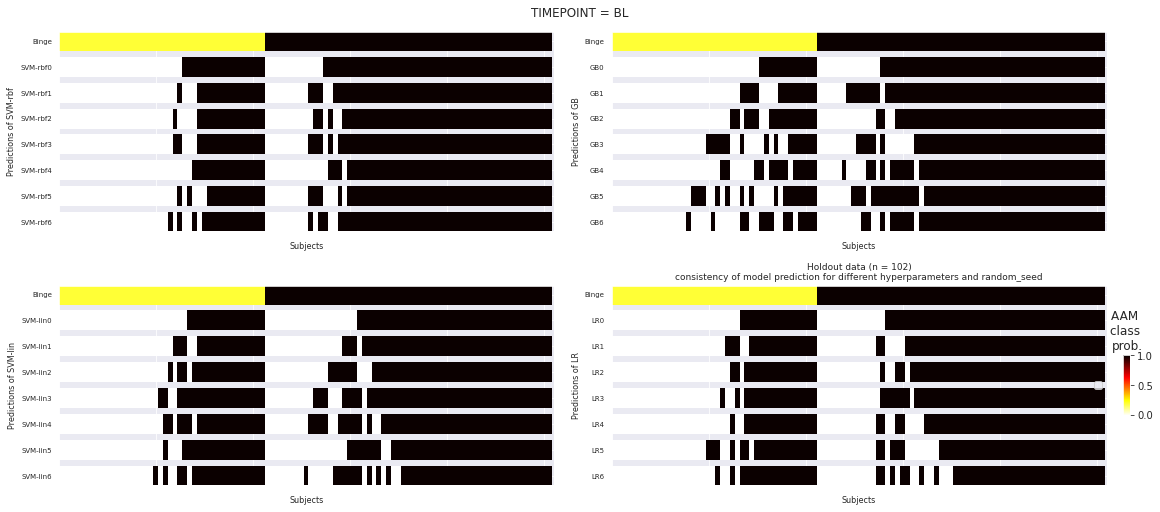

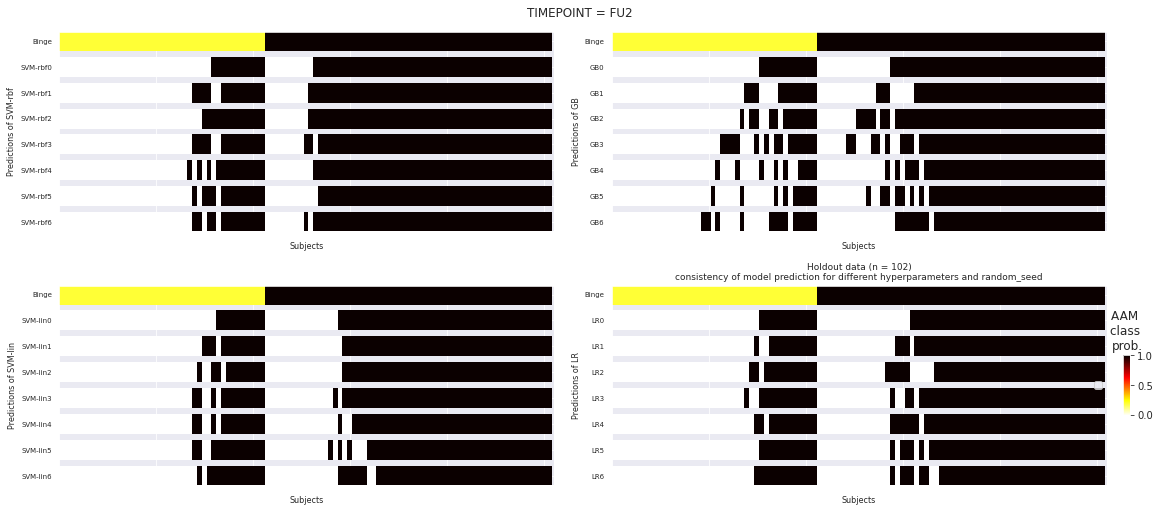

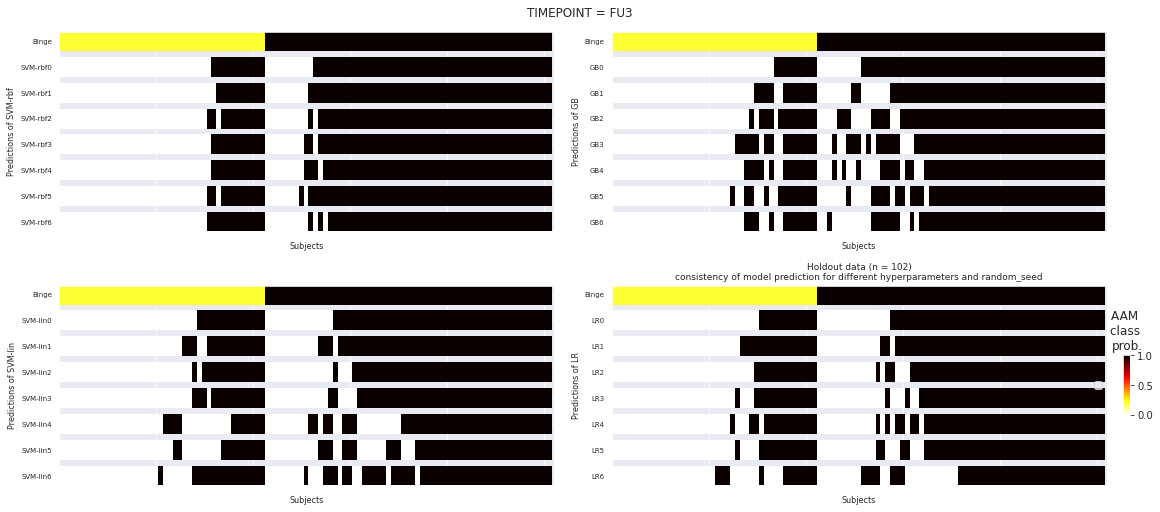

In [7]:
import matplotlib as mpl

USE_PROBS = False
TP = "FU3"

# load all labels
df_all_labels = load_all_labels(TP, val_type='categorize', exclude_holdout=False).dropna()
# load the holdout
df_hold = pd.read_csv("../MLpipelines/results/holdout_all-tp-clean_run.csv")
df_hold = df_hold[(df_hold['technique']=='cb') & ~df_hold['i_is_conf'] & ~df_hold['o_is_conf']].drop(columns=["Unnamed: 0"])

for tp, df_hold_tp in df_hold.groupby(['tp']):
    df_model_results = df_all_labels[[LABEL]] # use df_all_labels computed before
    # change the trial ID to reflect model accuracy
    for model, holdout in df_hold_tp.groupby(['model']):
        holdout['trial'].replace({t:i for i,t in enumerate(holdout.sort_values('holdout_roc_auc', ascending=False)['trial'])}, inplace=True)
        for trial, dfi in holdout.groupby(['trial']):
            ids_all = np.array([id_lists for ids in dfi["holdout_ids"] for id_lists in eval(ids)])
            assert ids_all.shape[0] == np.unique(ids_all).shape[0]
            pred_probs_all = np.array([prob_lists for probs in dfi["holdout_probs"] for prob_lists in eval(probs)])[:,1]
            y_pred_all = (pred_probs_all>0.5).astype(int)
            y_true_all = np.array([y_lists for y in dfi["holdout_lbls"] for y_lists in eval(y)])
            assert y_pred_all.shape[0] == y_true_all.shape[0]
            data = pred_probs_all if USE_PROBS else y_pred_all
            data = pd.DataFrame(index=ids_all, data={str(model)+str(trial):data})
            df_model_results = df_model_results.join(data)

    df_model_results = df_model_results.dropna()
    
    # # plot the correlations between the different models
    # corr = df_model_results.corr()
    # # Fill diagonal and upper half with NaNs
    # mask = np.zeros_like(corr, dtype=bool)
    # mask[np.triu_indices_from(mask)] = True
    # corr[mask] = np.nan
    # (corr.style.background_gradient(axis=None, vmin=0, vmax=1).highlight_null(null_color='#f1f1f1')).set_precision(2)  # Color NaNs grey

    fig, axes = plt.subplots(2,2, figsize=(16,len(df_model_results.columns)//4) , constrained_layout=True)
    fig.suptitle(f"TIMEPOINT = {tp.upper()}")
    cmap = plt.cm.hot_r
    cbar = fig.colorbar(
        mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=0, vmax=1), cmap=cmap),
        shrink=0.3, location='right')
    cbar.ax.set_title('AAM \nclass \nprob.')
    
    for i,model in enumerate(MODELS):
        dfi = df_model_results[[c for c in df_model_results.columns if (c ==LABEL) or (model.lower() in c.lower())]]
        sort_order = sorted(dfi.columns)
        ax = plot_subject_classes(dfi,
                             ax=np.ravel(axes)[i],
                             sort_order=sort_order,
                             lw=20, fs=7, cmap=cmap,
        title=f"Holdout data (n = {len(dfi)})\nconsistency of model prediction for different hyperparameters and random_seed")
        ax.set_ylabel(f"Predictions of {model}")
        plt.legend([])
    plt.show()

### How does the prediction probability distribution of the 4 models look?

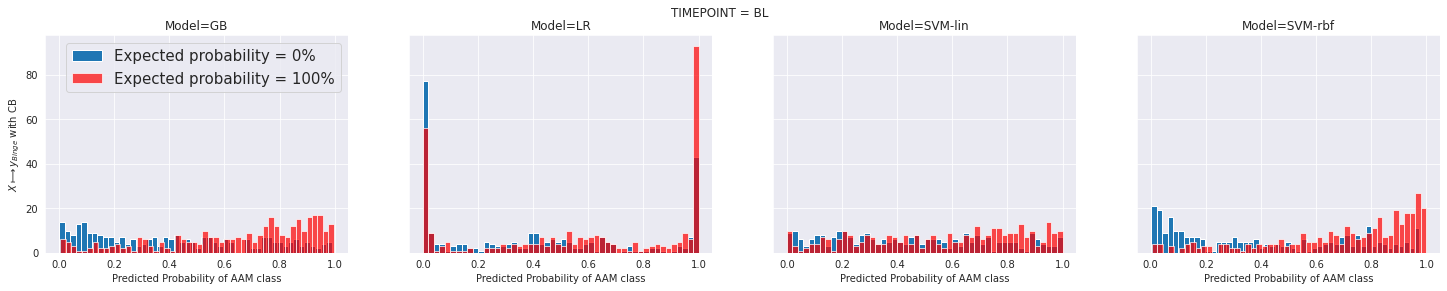

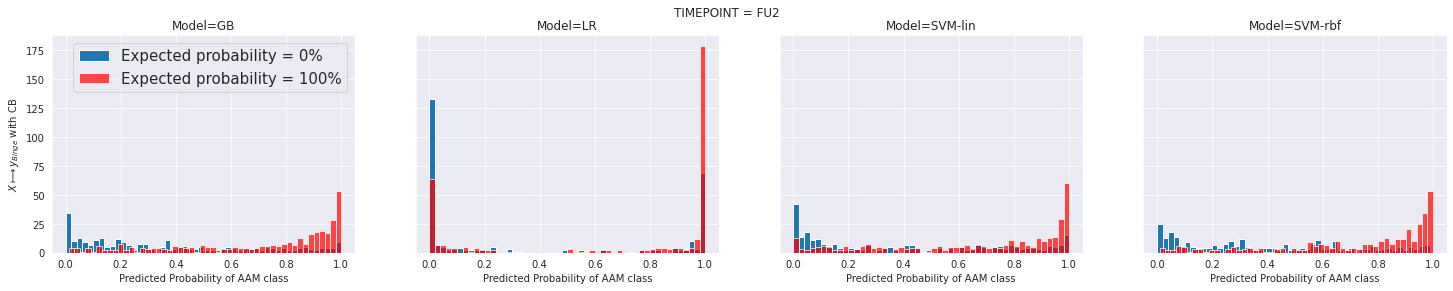

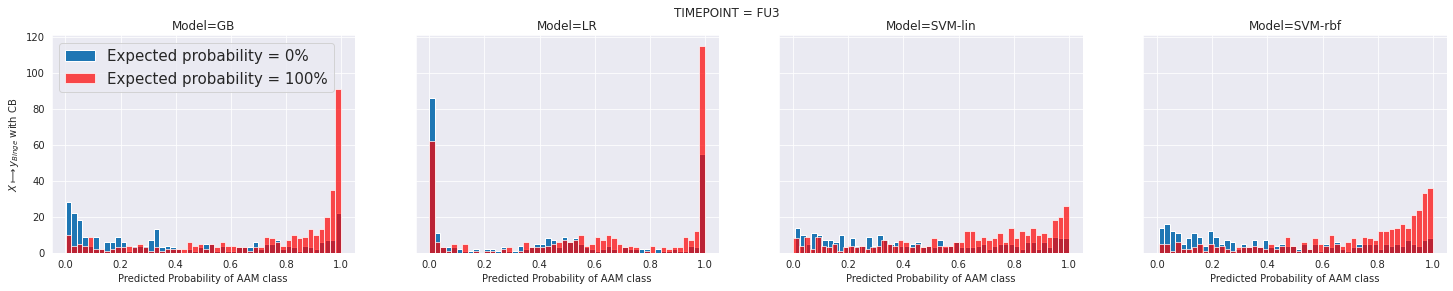

In [8]:
df_hold = pd.read_csv("../MLpipelines/results/holdout_all-tp-clean_run.csv")

for tp, df in df_hold.groupby(['tp']):
    grp_order = ["io", "technique", "model"]
    groups = df.groupby(grp_order)   
    n_models = len(df["model"].unique())
    n_rows = round(len(groups)/n_models)
    fig, axes = plt.subplots(n_rows, n_models, 
                             sharex=True, sharey=True,
                             figsize=(25, n_models*n_rows))
    fig.suptitle(f"TIMEPOINT = {tp.upper()}")
    axes = np.ravel(axes)

    for i, (g, dfi) in enumerate(groups):
        ids_all = np.array([id_lists for ids in dfi["test_ids"] for id_lists in eval(ids)])
        assert ids_all.shape[0] == np.unique(ids_all).shape[0]
        probs_all = np.array([prob_lists for probs in dfi["test_probs"] for prob_lists in eval(probs)])
        y_all = np.array([y_lists for y in dfi["test_lbls"] for y_lists in eval(y)])
        assert probs_all.shape[0] == y_all.shape[0]

        prediction=probs_all[:,1]
        ax = axes[i]
        ax.hist(prediction[y_all==0], bins=50, label='Expected probability = 0%')
        ax.hist(prediction[y_all==1], bins=50, label='Expected probability = 100%', alpha=0.7, color='r')
        ax.set_xlabel('Predicted Probability of AAM class')
        if i%n_models == 0:
            ax.set_ylabel("{} with {}".format(remap_io(dfi.iloc[0]), g[1].upper()))
        if i == 0:
            ax.legend(fontsize=15)
        ax.set_title("Model={}".format(g[-1]))

    plt.show()

### Are all 4 model predictions consistent?

In [9]:
model_results = load_all_model_preds(df_all_labels)
# [display(tp, tp_results) for tp, tp_results in model_results.items()]

              TP =  FU3


,Binge,SVM-rbf,GB,SVM-lin,LR
Binge,nan,nan,nan,nan,nan
SVM-rbf,0.42,nan,nan,nan,nan
GB,0.41,0.67,nan,nan,nan
SVM-lin,0.29,0.52,0.40,nan,nan
LR,0.27,0.53,0.39,0.67,nan


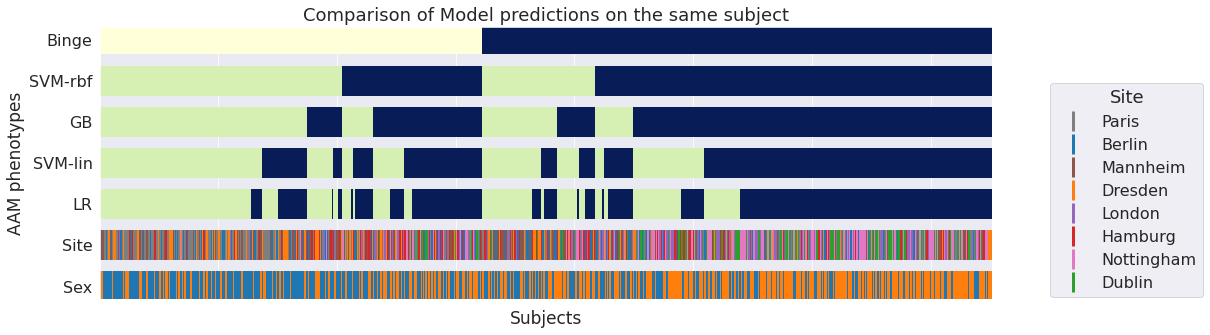

              TP =  FU2


,Binge,SVM-rbf,GB,SVM-lin,LR
Binge,nan,nan,nan,nan,nan
SVM-rbf,0.45,nan,nan,nan,nan
GB,0.42,0.60,nan,nan,nan
SVM-lin,0.36,0.55,0.44,nan,nan
LR,0.31,0.54,0.45,0.88,nan


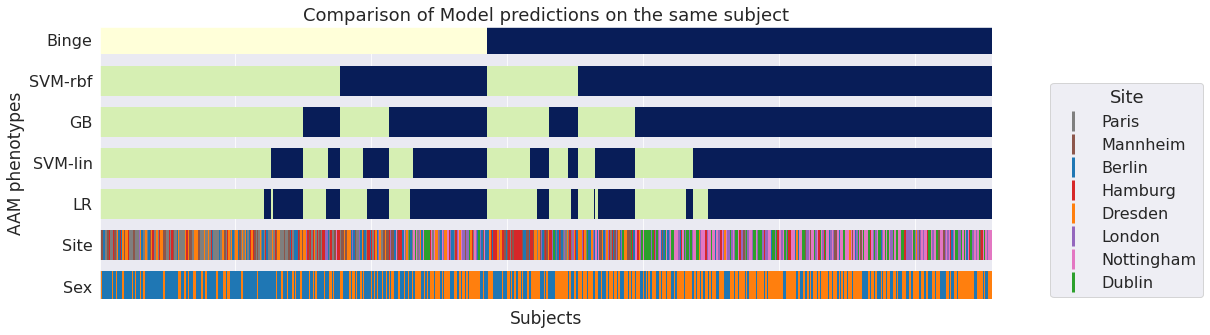

              TP =  BL


,Binge,SVM-rbf,GB,SVM-lin,LR
Binge,nan,nan,nan,nan,nan
SVM-rbf,0.39,nan,nan,nan,nan
GB,0.39,0.60,nan,nan,nan
SVM-lin,0.23,0.55,0.45,nan,nan
LR,0.24,0.54,0.37,0.69,nan


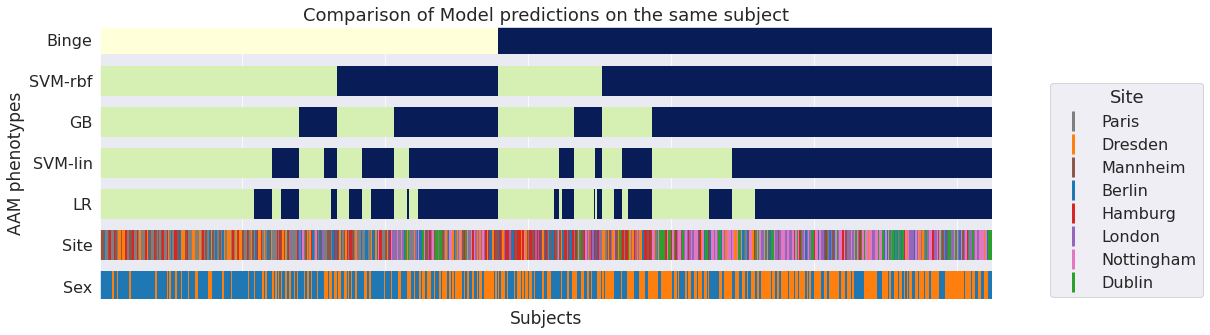

In [10]:
plot_subject_classes_modelwise(model_results, use_probs=False)

### Are all 4 model probabilities consistent? 

              TP =  FU3


,Binge,SVM-rbf,GB,SVM-lin,LR
Binge,nan,nan,nan,nan,nan
SVM-rbf,0.44,nan,nan,nan,nan
GB,0.42,0.82,nan,nan,nan
SVM-lin,0.28,0.69,0.54,nan,nan
LR,0.25,0.64,0.51,0.81,nan


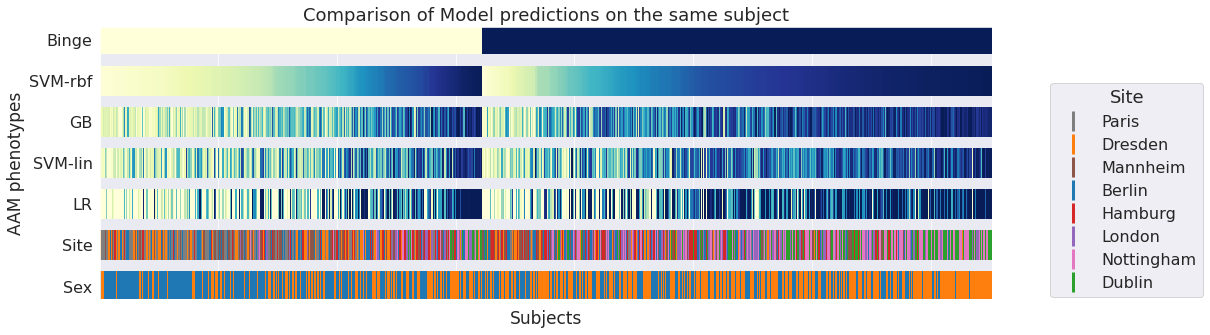

              TP =  FU2


,Binge,SVM-rbf,GB,SVM-lin,LR
Binge,nan,nan,nan,nan,nan
SVM-rbf,0.51,nan,nan,nan,nan
GB,0.47,0.76,nan,nan,nan
SVM-lin,0.39,0.68,0.53,nan,nan
LR,0.36,0.68,0.50,0.92,nan


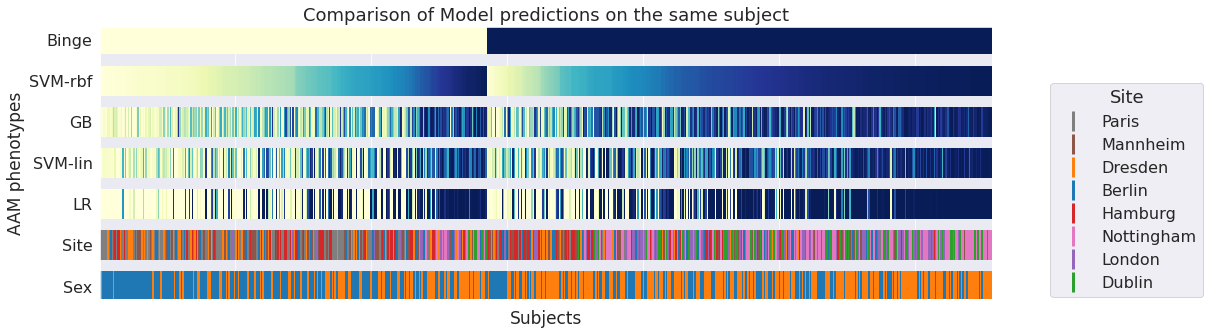

              TP =  BL


,Binge,SVM-rbf,GB,SVM-lin,LR
Binge,nan,nan,nan,nan,nan
SVM-rbf,0.45,nan,nan,nan,nan
GB,0.44,0.75,nan,nan,nan
SVM-lin,0.26,0.69,0.54,nan,nan
LR,0.22,0.60,0.44,0.73,nan


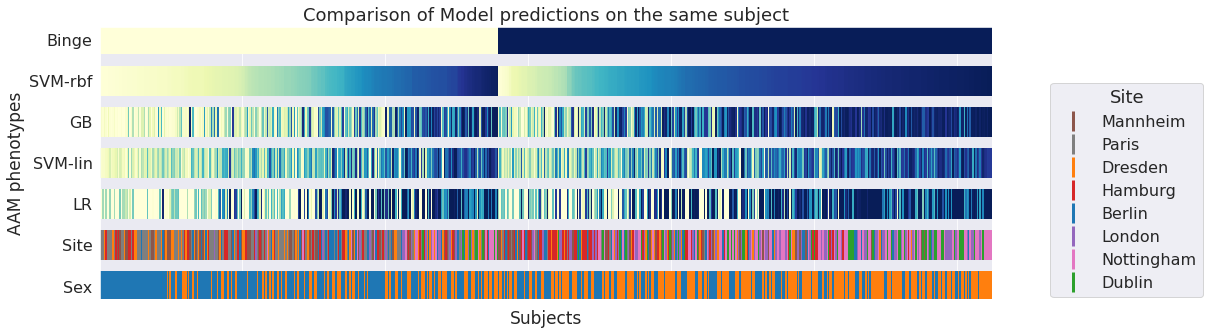

In [11]:
plot_subject_classes_modelwise(model_results, use_probs=True)

Correlate the prob. distributions against the Binge continuous variable

In [12]:
# get the raw BINGE values [0-6] and use that instead of the binary values
model_results_continuous = {}
for tp, df_model_results in model_results.items():
    model_result_continuous = df_model_results.copy()
    model_result_continuous['Binge'] = load_all_labels(tp.upper(), 'raw', exclude_holdout=False).dropna()['Binge']
    model_results_continuous[tp] = model_result_continuous

print("BINGE raw values [0-6] vs model prediction probalility")
plot_subject_classes_modelwise(model_results_continuous, use_probs=True, only_corr=True)

BINGE raw values [0-6] vs model prediction probalility
              TP =  FU3


,Binge,SVM-rbf,GB,SVM-lin,LR
Binge,nan,nan,nan,nan,nan
SVM-rbf,0.47,nan,nan,nan,nan
GB,0.44,0.80,nan,nan,nan
SVM-lin,0.31,0.67,0.52,nan,nan
LR,0.28,0.61,0.48,0.79,nan


              TP =  FU2


,Binge,SVM-rbf,GB,SVM-lin,LR
Binge,nan,nan,nan,nan,nan
SVM-rbf,0.49,nan,nan,nan,nan
GB,0.44,0.72,nan,nan,nan
SVM-lin,0.37,0.65,0.50,nan,nan
LR,0.32,0.65,0.45,0.92,nan


              TP =  BL


,Binge,SVM-rbf,GB,SVM-lin,LR
Binge,nan,nan,nan,nan,nan
SVM-rbf,0.48,nan,nan,nan,nan
GB,0.43,0.72,nan,nan,nan
SVM-lin,0.26,0.67,0.51,nan,nan
LR,0.18,0.55,0.39,0.70,nan


<div class="alert alert-block alert-warning">
To do / pending analysis:<br>    
1. run inference on the medium drinker group and see how the model predicts 
</div>

## Performance across sites and sex

**Main insights from below analysis**
<div class="alert alert-block alert-success">
The results in general hint towards site-specific results. Either the learned structural differences could be artifacts from differences in each site's data collection or the structural differences learned by the ML models are specific to some regions - suggesting demographic based differences.  <br>
    1. Models perform better on Dublin, Nottingham and London in the 1.3.2 experiment suggesting that the structural patterns might be more specific to the UK-Ireland demographic. <br>
    2. In 1.3.3 experiment, models least generalize to Dublin, followed by Hamburg and then Manheim. <br>
    3. Models seem to perform slightly better on Males than females but it is not consistent. <br>
</div>

Some conflicting empirical results have kept the question open whether the 'site' confound has been removed by counterbalancing-with-upsampling procedure and is not the main reason for the significant accuracy: 
1. _Leave-one-site-out_ CV gave non-significant mean accuracy across sites, suggesting that the models could not generalize across sites.
2. Comparing the several AAM labels experiments by visualizing how they chi-sq relationship between the 'site' confound and the label show mixed results - the accuracy is not directly proportional to the chi-sq between label and site but most high-accuracy categorizing labels **have** high chi-sq. You can see these results in section 1.3 in `plot_results.ipynb`<br>
3. Using the PBCC technique of _Dinga et al._ showed that the confounds could explain a major portion of the variance in the model accuracy on the holdout set. However, this method doesn't measure if the confounds were well controlled for.  

In [5]:
# load all labels
df_all_labels = load_all_labels(x_tp='FU3', val_type='categorize', exclude_holdout=False).dropna()
model_results = load_all_model_preds(df_all_labels)

In [6]:
from sklearn.metrics import confusion_matrix

def sensitivity_AAM_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tp / (tp+fn)

def specificity_HC_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn+fp)

In [7]:
# model order and models to show in all of the below analysis
MODELS = [ 'SVM-rbf', 'GB'] #'LR', 'SVM-lin',

### main experiment: sex

              TP =  FU3


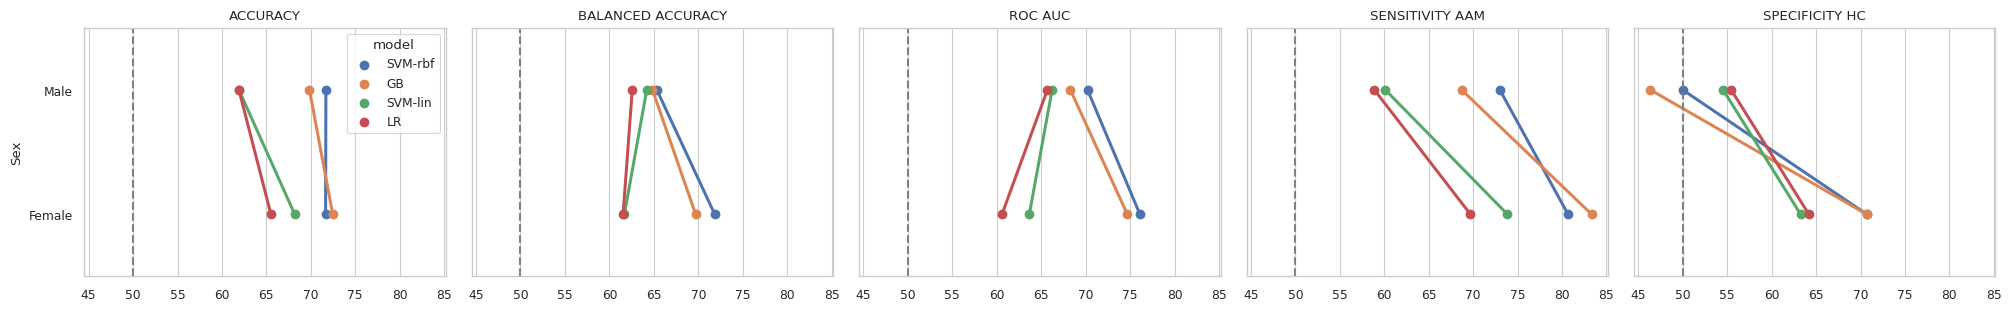

              TP =  FU2


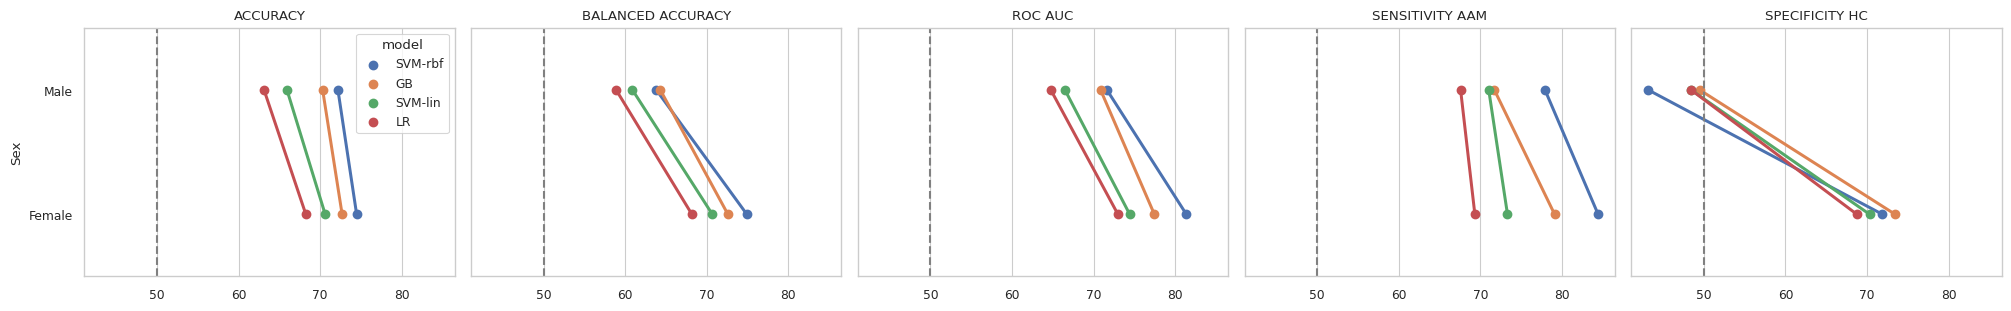

              TP =  BL


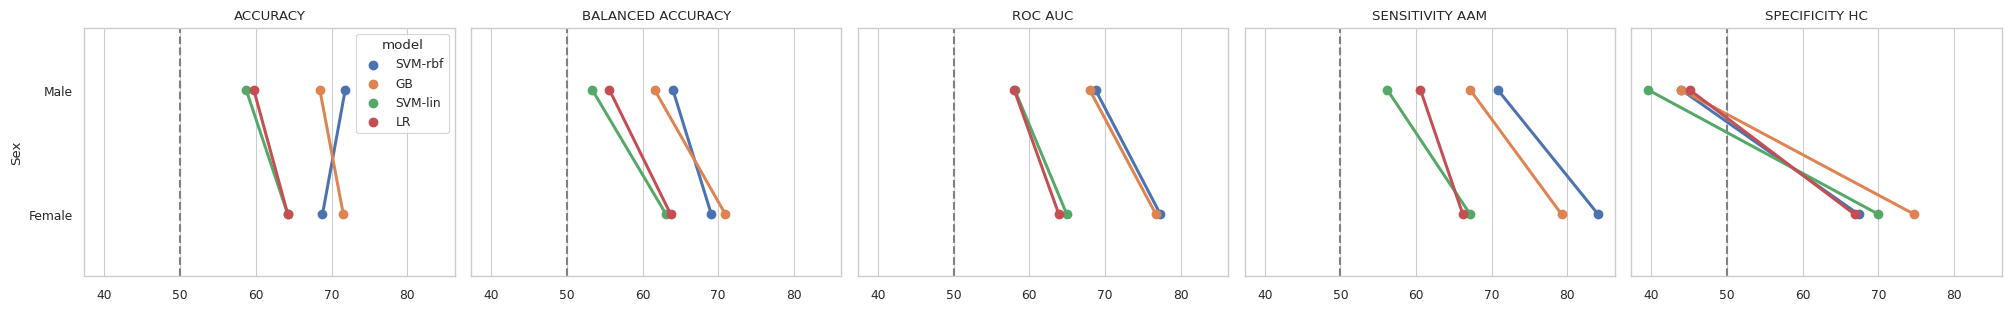

In [164]:
from sklearn.metrics import *
metrics = [accuracy_score, balanced_accuracy_score, roc_auc_score, sensitivity_AAM_score, specificity_HC_score]

for tp, df_model_results in model_results.items():
    print("=======================================\n              TP = ", tp.upper())
    
    sns.set(style='whitegrid', context='paper')
    fig, axes = plt.subplots(1, len(metrics), sharex=True, sharey=True,
                             figsize=(20, 3), constrained_layout=True)

    for i, metric in enumerate(metrics):
        ax = axes[i]
        x = metric.__name__
        data = {}
        for sex, dfi in df_model_results.dropna().groupby(['Sex']):
            if x=='roc_auc_score':
                scores = {model: metric(dfi[LABEL], dfi[model+'_prob'])*100 for model in MODELS}
            else:
                scores = {model: metric(dfi[LABEL], dfi[model])*100 for model in MODELS}
            data.update({sex: scores})
        dfi_computed = pd.DataFrame(data).unstack().reset_index().rename(columns={'level_0':'Sex', 'level_1':'model', 0:x})
        
        sns.pointplot(y="Sex", x=x, data=dfi_computed, 
                      order=dfi_computed[["Sex", x]].groupby("Sex").mean().sort_values(x, ascending=True).index,
                      hue="model", hue_order=MODELS,
                      join=True, palette=sns.color_palette(), 
                      ax=ax)
        ax.axvline(50, lw=1.5, color='gray',linestyle="--")
        ax.set_title(x.upper().replace("_",' ')[:-6])
        if i>0: ax.set_ylabel("")
        ax.set_xlabel("")
        if i!=0: ax.get_legend().remove()
    plt.show()

### main experiment: site

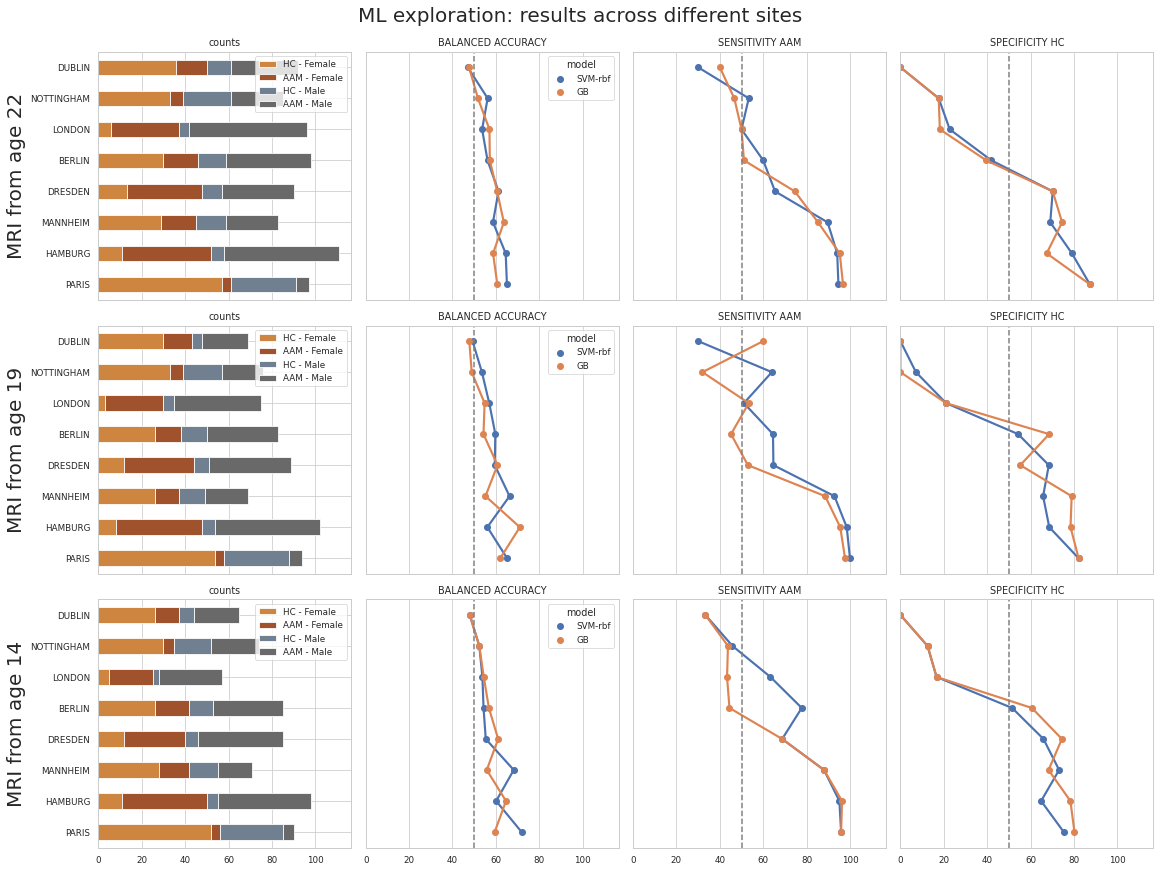

In [8]:
from sklearn.metrics import *
metrics = [balanced_accuracy_score, sensitivity_AAM_score, specificity_HC_score]

    
sns.set(style='whitegrid', context='paper')
fig, axes = plt.subplots(len(model_results), len(metrics)+1, sharex=True, sharey=True,
                         figsize=(len(metrics)*4+4, len(model_results)*4), constrained_layout=True)

fig.suptitle("ML exploration: results across different sites", fontsize=20)

titles = {'fu3':"MRI from age 22",
          'fu2':"MRI from age 19",
          'bl' :"MRI from age 14"}

for k, (tp, df_model_results) in enumerate(model_results.items()):
    ax_row = axes[k]
     # first add a subplot showing the proportions of Labels and Sexes
    cnts = {}
    for site, dfi in df_model_results[['Binge','Sex','Site']].dropna().groupby('Site'):
        Sex_AAM_list = dfi['Binge'].map({0:'HC', 1:'AAM'}).astype(str) + ' - ' + dfi['Sex']
        cnts.update({site: Sex_AAM_list.value_counts()})  

    cnts = pd.DataFrame(cnts).reindex(["HC - Female","AAM - Female","HC - Male","AAM - Male"]).T
    cnts.plot.barh(ax=ax_row[0], stacked=True, color=['peru', 'sienna',  'slategrey', 'dimgrey'], title='counts')
    ax_row[0].set_ylabel(titles[tp], fontdict={'fontsize': 20})
    
    for i, metric in enumerate(metrics):
        ax = ax_row[i+1]
        x = metric.__name__
        data = {}        
        # compute the metric from already generated dict 'df_model_results'
        for site, dfi in df_model_results.dropna().groupby(['Site']):
            if x=='roc_auc_score':
                scores = {model: metric(dfi[LABEL], dfi[model+'_prob'])*100 for model in MODELS}
            else:
                scores = {model: metric(dfi[LABEL], dfi[model])*100 for model in MODELS}
            data.update({site.upper(): scores})
        
        # rename the labels and reorg
        dfi_computed = pd.DataFrame(data).unstack().reset_index().rename(columns={'level_0':'Site', 'level_1':'model', 0:x})
        
        sns.pointplot(y="Site", x=x, data=dfi_computed, 
                      order=dfi_computed[["Site", x]].groupby("Site").mean().sort_values(x, ascending=True).index,
                      hue="model", hue_order=MODELS,
                      join=True, palette=sns.color_palette(), 
                      ax=ax)
        
        ax.axvline(50, lw=1.5, color='gray',linestyle="--")
        ax.set_title(x.upper().replace("_",' ')[:-6])
        if i>0: ax.set_ylabel("")
        ax.set_xlabel("")
        if i!=0: ax.get_legend().remove()
        
# plt.show()
plt.savefig("../figures/results_review1_1.pdf", bbox_inches='tight', pad_inches=0)

### side experiment: _leave-one-site-out_ 
(a) 8-fold cross validation without a separate holdout

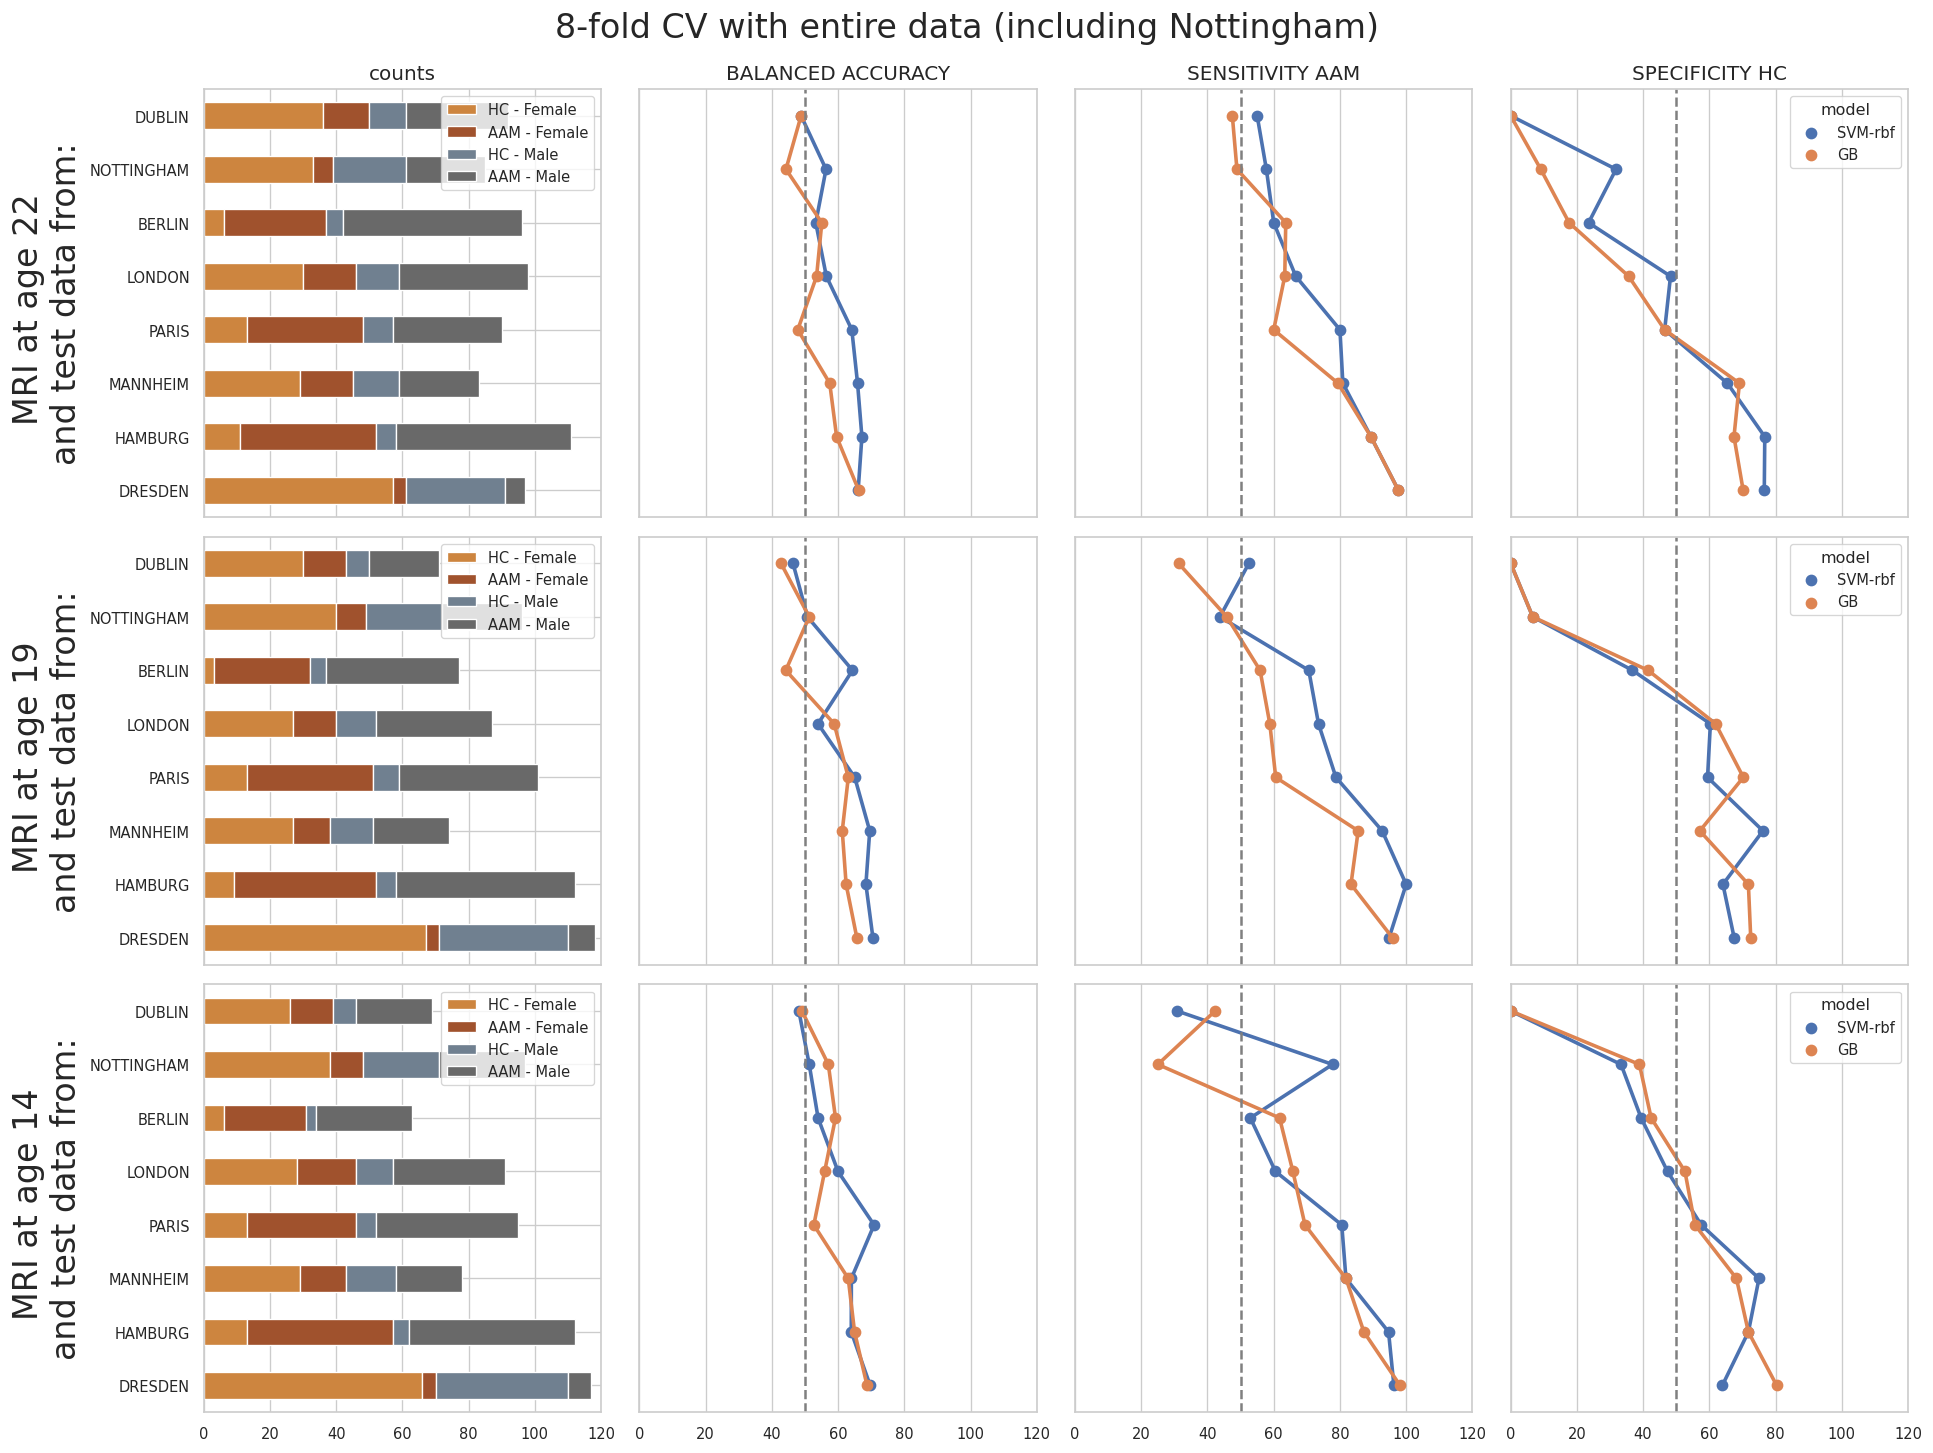

In [10]:
r_path = "fulldata"
label = '19a-binge'
df_fulls = [
    ("MRI at age 22 \nand test data from:", pd.read_csv(glob(f"../MLpipelines/results/across_sites/{r_path}-fu3*{label}*/*/run.csv")[0])),
    ("MRI at age 19 \nand test data from:", pd.read_csv(glob(f"../MLpipelines/results/across_sites/{r_path}-fu2*{label}*/*/run.csv")[0])),
    ("MRI at age 14 \nand test data from:",  pd.read_csv(glob(f"../MLpipelines/results/across_sites/{r_path}-bl*{label}*/*/run.csv" )[0])),
]

metrics = [balanced_accuracy_score, sensitivity_AAM_score, specificity_HC_score]

xlim = [0, 120]

sns.set(style='whitegrid', context='paper')
fig, axes = plt.subplots(len(df_fulls), len(metrics)+1,  
                         dpi=120, sharex=True, sharey=True,
                         figsize=(4*len(metrics)+4, 4*len(df_fulls)), constrained_layout=True)

fig.suptitle("8-fold CV with entire data (including Nottingham)", fontsize=20)

def remap_test_ids_to_site(test_ids):
    test_ids = eval(test_ids)
    # load the information on which site each subject (ID) belong to 
    sub_ids_to_site = pd.read_csv("/ritter/share/data/IMAGEN/IMAGEN_BIDS/participants_BL.csv", 
                                  usecols=["ID","site"], index_col=["ID"])
    sites = sub_ids_to_site.loc[test_ids]
    return sites["site"].unique()[0]

def remap_test_ids_to_sex(test_ids):
    test_ids = eval(test_ids)
    # load the information on which site each subject (ID) belong to 
    sub_ids_to_sex = pd.read_csv("/ritter/share/data/IMAGEN/IMAGEN_BIDS/participants_BL.csv", 
                                  usecols=["ID","sex"], index_col=["ID"])
    return sub_ids_to_sex.loc[test_ids, "sex"]

for i, (title, df) in enumerate(df_fulls):
    
    ax_row = axes[i]    
    
    # select some specific models to show
    df = df[df['model'].isin(MODELS)][['model', 'test_lbls', 'test_ids', 'test_probs']].copy()
    # from the test_ids determine the site of that CV fold
    df["Site"] = df["test_ids"].apply(remap_test_ids_to_site)
    
    # plot the distribution of sex within each site
    cnts = {}
    for n, row in df.iterrows():
        Sex_list = remap_test_ids_to_sex(row["test_ids"]).map({'F':'Female', 'M':'Male'})
        AAM_list = pd.Series(index=Sex_list.index, data=eval(row['test_lbls'])).map({0:'HC', 1:'AAM'})
        Sex_AAM_list = AAM_list.astype(str) + ' - ' + Sex_list
        cnts.update({row['Site']: Sex_AAM_list.value_counts()})
        
    cnts = pd.DataFrame(cnts).reindex(["HC - Female","AAM - Female","HC - Male","AAM - Male"]).T
    # display(cnts)
    cnts.plot.barh(ax=ax_row[0], stacked=True, color=['peru', 'sienna',  'slategrey', 'dimgrey'] )
    # sns.barplot(x='Count', y='Site', hue='AAM & Sex', data=cnts, ax=ax_row[0])
    
    if i==0: 
        ax_row[0].set_title('counts', fontdict={'fontsize': 12})
    else: 
        ax_row[0].set_title('')
    ax_row[0].set_xlabel('')
    ax_row[0].set_ylabel(title, fontdict={'fontsize': 20})
    # continue
    
    # iterate through each given metric and compute it and plot it in a separate col
    for j, metric in enumerate(metrics):
        
        x = metric.__name__
        df[x] = np.NaN
        ax = ax_row[j+1]
        # compute all scores with the given metric and store in data
        data = {}
        for k, row in df.iterrows():
            y_true = np.array(eval(row['test_lbls']))
            y_pred = np.argmax(np.array(eval(row['test_probs'])), axis=1)
            df.loc[k,x] = metric(y_true, y_pred)*100

        sns.pointplot(y="Site", x=x, hue="model", data=df,
                      order=df[["Site", x]].groupby("Site").mean().sort_values(x, ascending=True).index,
                      hue_order=MODELS,
                      join=True, palette=sns.color_palette(), 
                      ax=ax, xlim=xlim) 

        ax.axvline(50, lw=1.5, color='gray',linestyle="--")  
        ax.set_xlim(xlim)
        ax.set_xlabel('')
        ax.set_ylabel('')
        if i==0: ax.set_title(x.upper().replace('_',' ')[:-6], fontdict={'fontsize': 12})
        if j!=len(metrics)-1: ax.get_legend().remove()

# plt.show()
plt.savefig("../figures/review_1_loso_2.jpg", bbox_inches='tight', pad_inches=0)

(b) 7-fold cross validation with a separate holdout 'Nottingham'

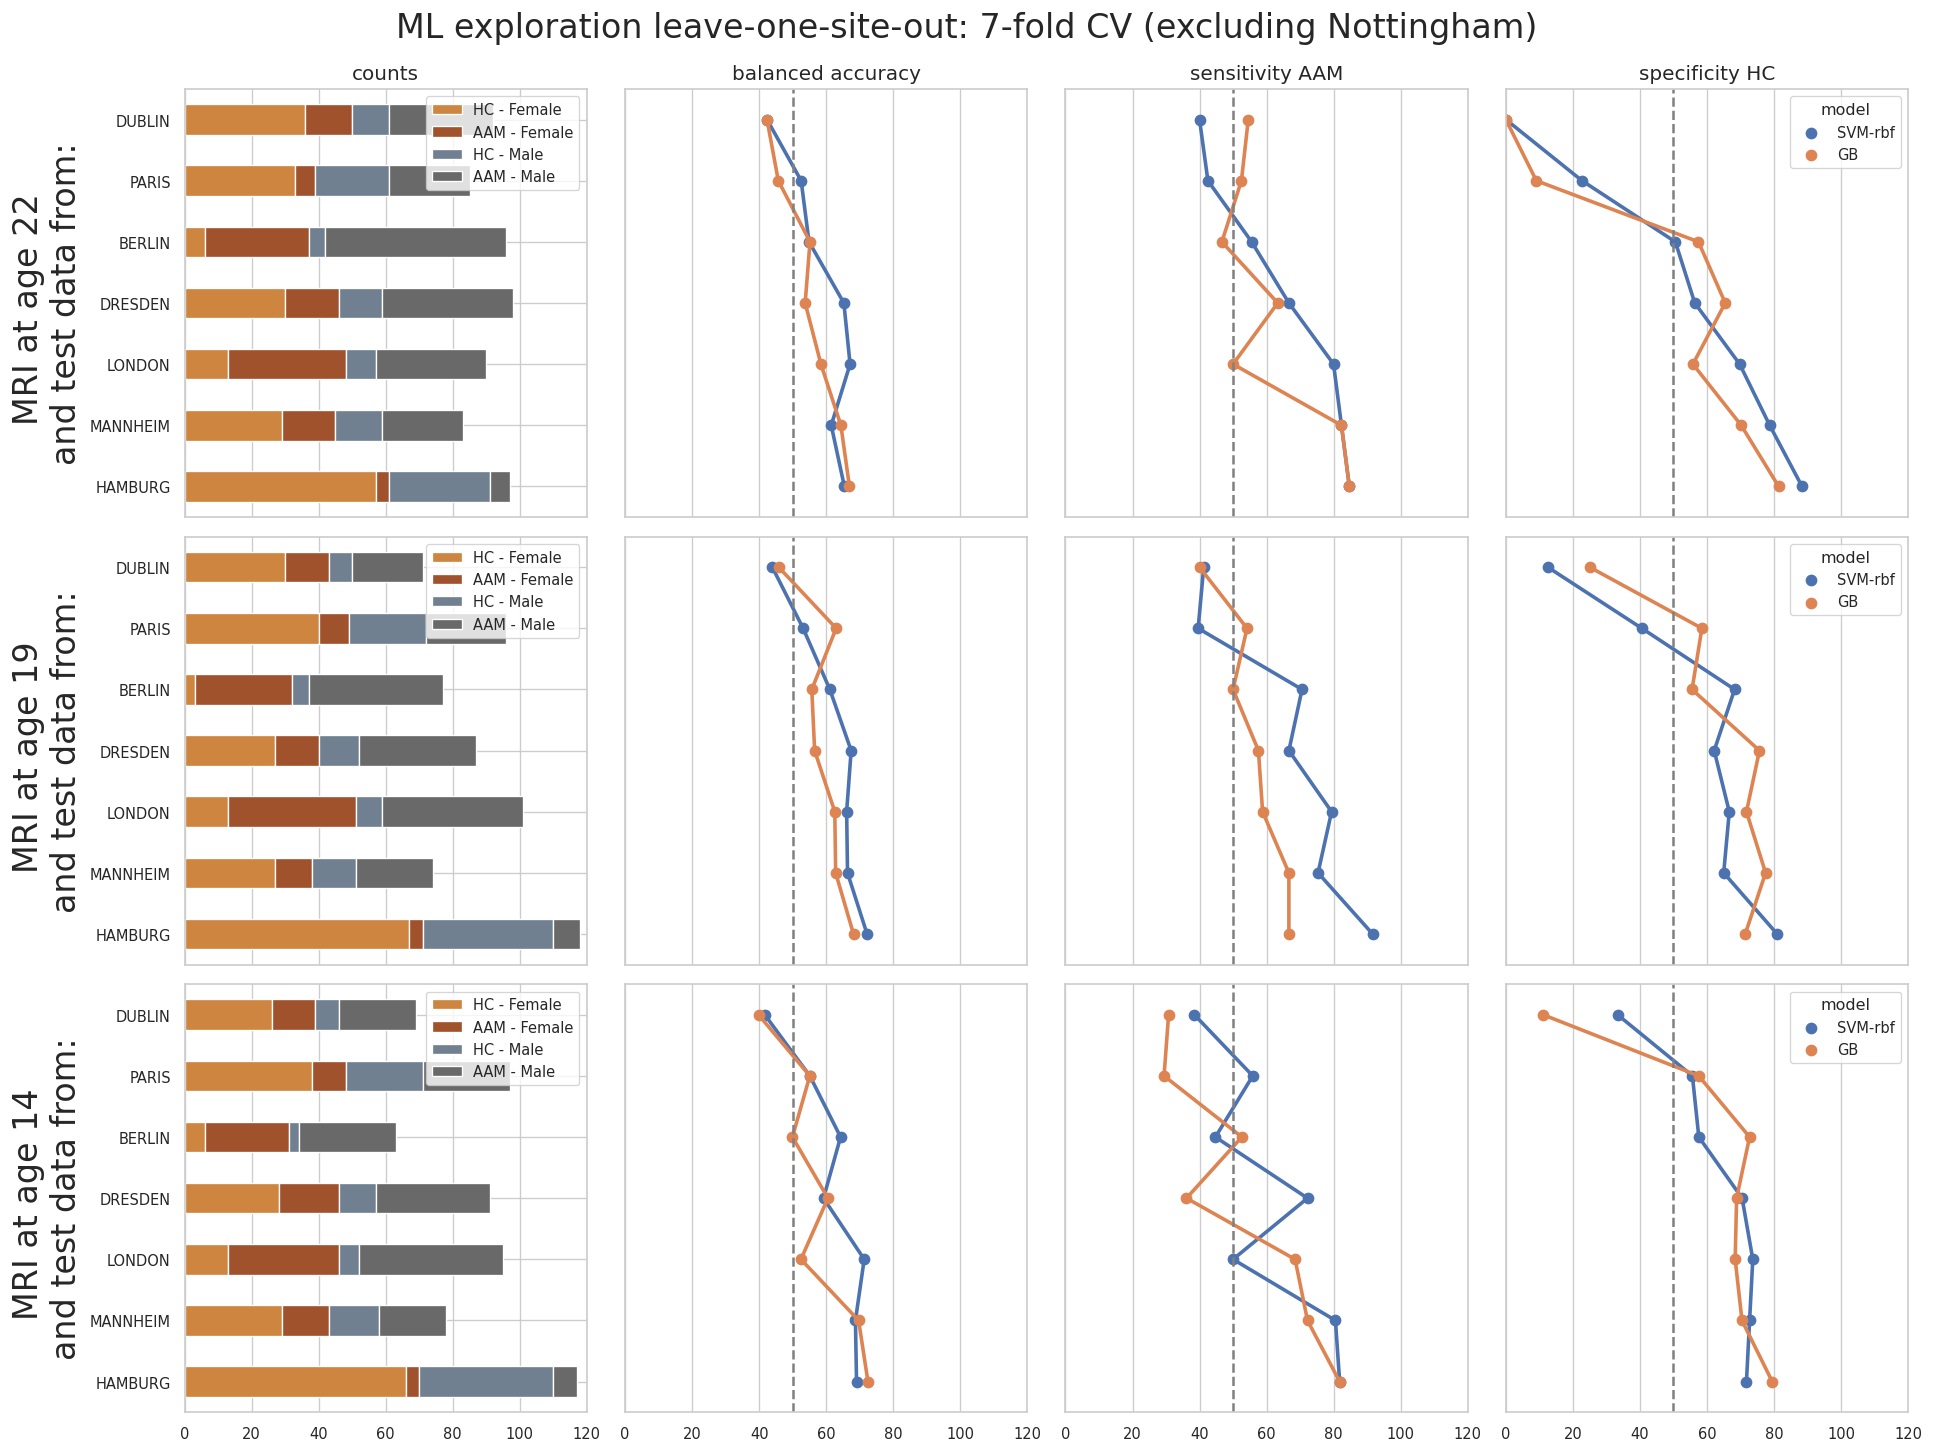

In [9]:
r_path = "lbls"
label = '19a-binge'
df_fulls = [
    ("MRI at age 22 \nand test data from:", pd.read_csv(glob(f"../MLpipelines/results/across_sites/{r_path}-fu3*{label}*/*/run.csv")[0])),
    ("MRI at age 19 \nand test data from:", pd.read_csv(glob(f"../MLpipelines/results/across_sites/{r_path}-fu2*{label}*/*/run.csv")[0])),
    ("MRI at age 14 \nand test data from:",  pd.read_csv(glob(f"../MLpipelines/results/across_sites/{r_path}-bl*{label}*/*/run.csv" )[0])),
]

metrics = [balanced_accuracy_score, sensitivity_AAM_score, specificity_HC_score]

xlim = [0, 120]

sns.set(style='whitegrid', context='paper')
fig, axes = plt.subplots(len(df_fulls), len(metrics)+1,  
                         dpi=120, sharex=True, sharey=True,
                         figsize=(4*len(metrics)+4, 4*len(df_fulls)), constrained_layout=True)
fig.suptitle("ML exploration leave-one-site-out: 7-fold CV (excluding Nottingham)", 
             fontsize=20)

def remap_test_ids_to_site(test_ids):
    test_ids = eval(test_ids)
    # load the information on which site each subject (ID) belong to 
    sub_ids_to_site = pd.read_csv("/ritter/share/data/IMAGEN/IMAGEN_BIDS/participants_BL.csv", 
                                  usecols=["ID","site"], index_col=["ID"])
    sites = sub_ids_to_site.loc[test_ids]
    return sites["site"].unique()[0]

def remap_test_ids_to_sex(test_ids):
    test_ids = eval(test_ids)
    # load the information on which site each subject (ID) belong to 
    sub_ids_to_sex = pd.read_csv("/ritter/share/data/IMAGEN/IMAGEN_BIDS/participants_BL.csv", 
                                  usecols=["ID","sex"], index_col=["ID"])
    return sub_ids_to_sex.loc[test_ids, "sex"]

for i, (title, df) in enumerate(df_fulls):
    
    ax_row = axes[i]    
    
    # select some specific models to show
    df = df[df['model'].isin(MODELS)][['model', 'test_lbls', 'test_ids', 'test_probs']].copy()
    # from the test_ids determine the site of that CV fold
    df["Site"] = df["test_ids"].apply(remap_test_ids_to_site)
    
    # plot the distribution of sex within each site
    cnts = {}
    for n, row in df.iterrows():
        Sex_list = remap_test_ids_to_sex(row["test_ids"]).map({'F':'Female', 'M':'Male'})
        AAM_list = pd.Series(index=Sex_list.index, data=eval(row['test_lbls'])).map({0:'HC', 1:'AAM'})
        Sex_AAM_list = AAM_list.astype(str) + ' - ' + Sex_list
        cnts.update({row['Site']: Sex_AAM_list.value_counts()})
        
    cnts = pd.DataFrame(cnts).reindex(["HC - Female","AAM - Female","HC - Male","AAM - Male"]).T
    # display(cnts)
    cnts.plot.barh(ax=ax_row[0], stacked=True, color=['peru', 'sienna',  'slategrey', 'dimgrey'] )
    # sns.barplot(x='Count', y='Site', hue='AAM & Sex', data=cnts, ax=ax_row[0])
    
    if i==0: 
        ax_row[0].set_title('counts', fontdict={'fontsize': 12})
    else: 
        ax_row[0].set_title('')
    ax_row[0].set_xlabel('')
    ax_row[0].set_ylabel(title, fontdict={'fontsize': 20})
    # continue
    
    # iterate through each given metric and compute it and plot it in a separate col
    for j, metric in enumerate(metrics):
        
        x = metric.__name__
        df[x] = np.NaN
        ax = ax_row[j+1]
        # compute all scores with the given metric and store in data
        data = {}
        for k, row in df.iterrows():
            y_true = np.array(eval(row['test_lbls']))
            y_pred = np.argmax(np.array(eval(row['test_probs'])), axis=1)
            df.loc[k,x] = metric(y_true, y_pred)*100

        sns.pointplot(y="Site", x=x, hue="model", data=df,
                      order=df[["Site", x]].groupby("Site").mean().sort_values(x, ascending=True).index,
                      hue_order=MODELS,
                      join=True, palette=sns.color_palette(), 
                      ax=ax, xlim=xlim) 

        ax.axvline(50, lw=1.5, color='gray',linestyle="--")  
        ax.set_xlim(xlim)
        ax.set_xlabel('')
        ax.set_ylabel('')
        if i==0: ax.set_title(x.replace('_',' ')[:-6], fontdict={'fontsize': 12})
        if j!=len(metrics)-1: ax.get_legend().remove()

# plt.show()
plt.savefig("../figures/results_review_1_2.pdf", bbox_inches='tight', pad_inches=0)

In [168]:
# df_holdout = pd.read_csv("../MLpipelines/results/holdout_results_sites.csv")

In [162]:
# df_holdout